The dataset is about employee attrition. This analysis can discover if any particular factors or patterns that lead to attrition. If so, employers can take certain precausion to prevent attrition which in employer of view, employee attrition is a loss to company, in both monetary and non-monetary

   Dataset Description

The dataset for this competition (both train and test) for a Employee Attrition. 


train.csv - the training dataset; Attrition is the binary target
            
So its a Classifiaction Problem
            
test.csv - the test dataset; your objective is to predict the probability of positive Attrition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Collection

Loading the csv file from pandas dataframe

In [2]:
import io
%cd "C:\Users\91866\Desktop\github_dataset\Employee Attrition"

C:\Users\91866\Desktop\github_dataset\Employee Attrition


In [3]:
train_data=pd.read_csv("train.csv")

In [4]:
test_data=pd.read_csv("test.csv")

In [5]:
# Printing the first five rows of dataset
train_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [6]:
# Printing the last five rows of Dataset
train_data.tail()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0
1676,1676,36,Travel_Rarely,1141,Research & Development,20,3,Life Sciences,1,3,...,80,0,10,3,2,8,2,7,3,0


In [7]:
# Read the rows and columns
train_data.shape


(1677, 35)

In [8]:
# Extracting information of Datasets
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1119 non-null   int64 
 1   Age                       1119 non-null   int64 
 2   BusinessTravel            1119 non-null   object
 3   DailyRate                 1119 non-null   int64 
 4   Department                1119 non-null   object
 5   DistanceFromHome          1119 non-null   int64 
 6   Education                 1119 non-null   int64 
 7   EducationField            1119 non-null   object
 8   EmployeeCount             1119 non-null   int64 
 9   EnvironmentSatisfaction   1119 non-null   int64 
 10  Gender                    1119 non-null   object
 11  HourlyRate                1119 non-null   int64 
 12  JobInvolvement            1119 non-null   int64 
 13  JobLevel                  1119 non-null   int64 
 14  JobRole                 

In [10]:
train_data.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [11]:
# knowing the statistical measures

train_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


Exploratory Data Analysis

In [12]:
# Checking the number missing value of each columns 

train_data.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

<AxesSubplot: >

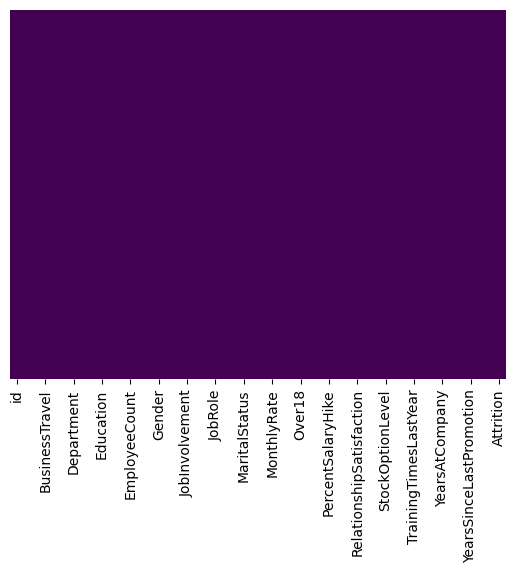

In [13]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [14]:
train_data.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [15]:
train_data_new = train_data[['BusinessTravel', 'Department', 'Education', 'EducationField',
            'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
            'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
             'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
             'TrainingTimesLastYear', 'WorkLifeBalance', 'Attrition']]

In [16]:
for i in train_data_new.columns:
    print(train_data_new[i].unique())

['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
['Research & Development' 'Sales' 'Human Resources']
[ 3  4  1  2  5 15]
['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
[4 1 3 2]
['Male' 'Female']
[3 1 2 4]
['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
[4 1 2 3]
['Married' 'Divorced' 'Single']
[1 0 3 5 2 8 6 7 9 4]
['Yes' 'No']
[3 4]
[2 4 3 1]
[1 2 0 3]
[2 3 1 0 5 4 6]
[3 1 2 4]
[0 1]


<AxesSubplot: xlabel='Attrition', ylabel='count'>

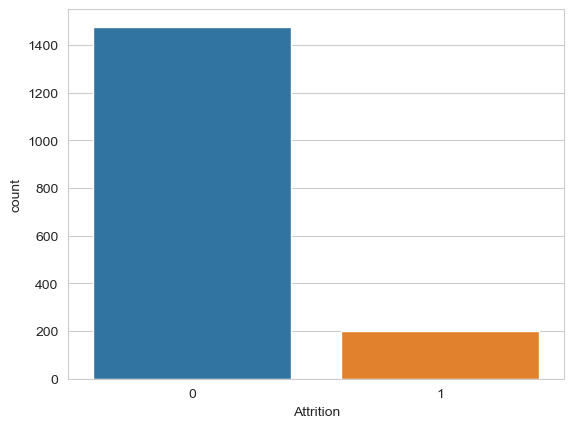

In [17]:
# Making Count plot survived column
sns.set_style('whitegrid')
sns.countplot(x='Attrition',data=train_data)

<AxesSubplot: xlabel='Attrition', ylabel='count'>

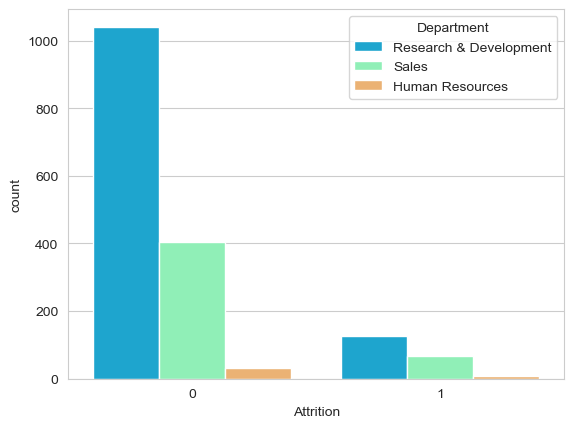

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='Department',data=train_data,palette='rainbow')

<AxesSubplot: xlabel='Attrition', ylabel='count'>

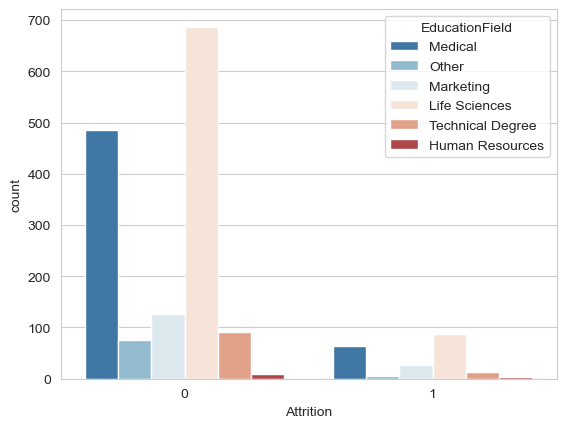

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='EducationField',data=train_data,palette='RdBu_r')

<AxesSubplot: xlabel='Attrition', ylabel='count'>

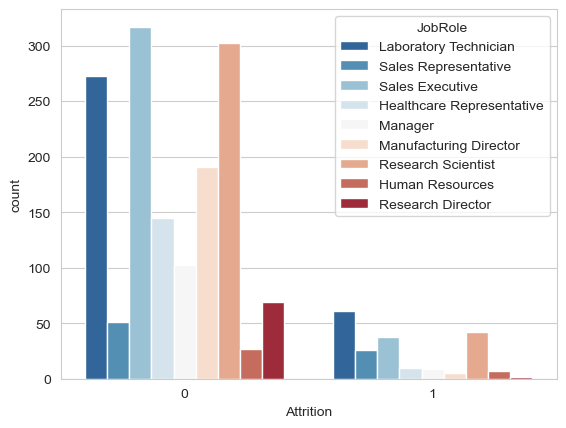

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='JobRole',data=train_data,palette='RdBu_r')

<AxesSubplot: xlabel='Attrition', ylabel='count'>

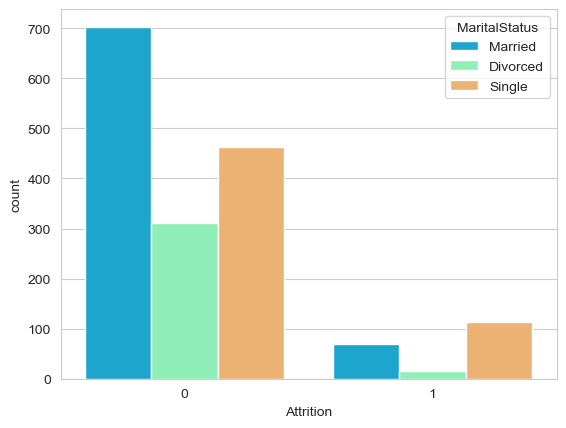

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='MaritalStatus',data=train_data,palette='rainbow')

<AxesSubplot: xlabel='Attrition', ylabel='count'>

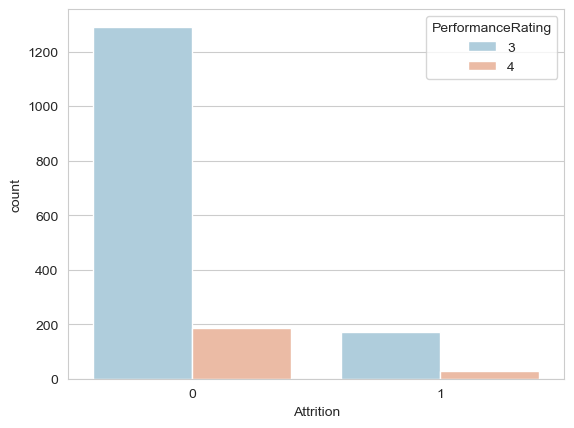

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='PerformanceRating',data=train_data,palette='RdBu_r')

<AxesSubplot: xlabel='Attrition', ylabel='count'>

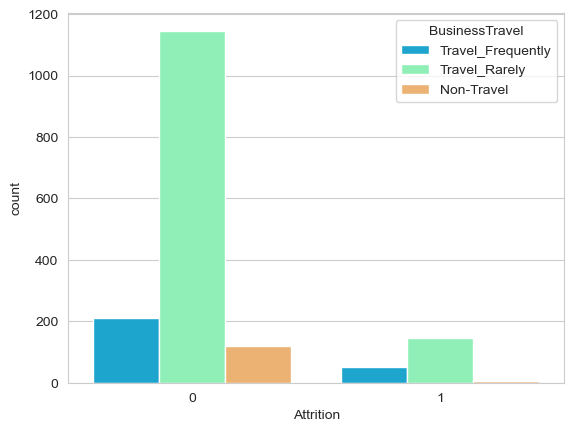

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',hue='BusinessTravel',data=train_data,palette='rainbow')

<AxesSubplot: xlabel='NumCompaniesWorked', ylabel='count'>

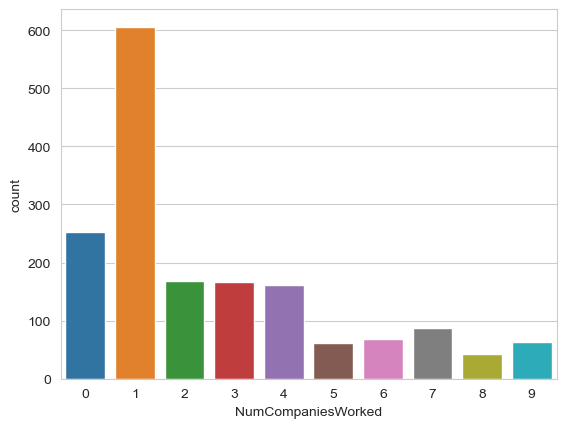

In [24]:
sns.countplot(x='NumCompaniesWorked',data=train_data)


  Hypothesis Testing

In [25]:
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [26]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train_data.NumCompaniesWorked,train_data.Attrition))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 44.113516937953285
Degrees of Freedom : 9
P-Value : 1.3450486490357514e-06
Contingency Table : [[222.82707215  30.17292785]
 [533.72808587  72.27191413]
 [148.84496124  20.15503876]
 [146.20274299  19.79725701]
 [141.79904592  19.20095408]
 [ 53.72510435   7.27489565]
 [ 59.89028026   8.10971974]
 [ 77.50506857  10.49493143]
 [ 36.99105546   5.00894454]
 [ 55.48658318   7.51341682]]
p-value=0.000, Null hypothesis is rejected


In [27]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train_data.JobRole,train_data.Attrition))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 78.66992094957163
Degrees of Freedom : 8
P-Value : 9.052127963204723e-14
Contingency Table : [[136.51460942  18.48539058]
 [ 29.94514013   4.05485987]
 [294.16696482  39.83303518]
 [ 97.76207513  13.23792487]
 [172.62492546  23.37507454]
 [ 62.53249851   8.46750149]
 [302.97435897  41.02564103]
 [312.66249255  42.33750745]
 [ 67.816935     9.183065  ]]
p-value=0.000, Null hypothesis is rejected


In [28]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train_data.JobRole,train_data.Attrition))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 78.66992094957163
Degrees of Freedom : 8
P-Value : 9.052127963204723e-14
Contingency Table : [[136.51460942  18.48539058]
 [ 29.94514013   4.05485987]
 [294.16696482  39.83303518]
 [ 97.76207513  13.23792487]
 [172.62492546  23.37507454]
 [ 62.53249851   8.46750149]
 [302.97435897  41.02564103]
 [312.66249255  42.33750745]
 [ 67.816935     9.183065  ]]
p-value=0.000, Null hypothesis is rejected


In [29]:
# ANOVA TEST for - JobRole with Age
f_stats, p_value = stats.f_oneway(train_data[train_data['JobRole'] =='Laboratory Technician']['Age'],
                                  train_data[train_data['JobRole'] =='Sales Representative']['Age'],
                                  train_data[train_data['JobRole'] =='Sales Executive']['Age'],
                                  train_data[train_data['JobRole'] =='Healthcare Representative']['Age'],
                                  train_data[train_data['JobRole'] =='Manager']['Age'],
                                  train_data[train_data['JobRole'] =='Manufacturing Director']['Age'],
                                  train_data[train_data['JobRole'] =='Research Scientist']['Age'],
                                  train_data[train_data['JobRole'] =='Human Resources']['Age'],
                                  train_data[train_data['JobRole'] =='Research Director']['Age'])

print("--ANOVA hypothesis test--")
print("\n")
print("F_statistics:", f_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--ANOVA hypothesis test--


F_statistics: 47.52460281919336
P-value: 2.683832111385595e-69
p-value=0.000, Null hypothesis is rejected


In [30]:
# ANOVA TEST for - Department with age
f_stats, p_value = stats.f_oneway(train_data[train_data['Department'] =='Research & Development']['Age'],
                                  train_data[train_data['Department'] =='Sales']['Age'],
                                train_data[train_data['Department'] =='Human Resources']['Age'])

print("--ANOVA hypothesis test--")
print("\n")
print("F_statistics:", f_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--ANOVA hypothesis test--


F_statistics: 0.8080497349866917
P-value: 0.4459002817673653
p-value=0.446 failed to reject null hypothesis.


In [31]:
for i in train_data_new.columns:
    print(train_data_new[i].value_counts())

Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: BusinessTravel, dtype: int64
Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64
3     682
4     464
2     304
1     182
5      44
15      1
Name: Education, dtype: int64
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: EducationField, dtype: int64
4    537
3    496
2    345
1    299
Name: EnvironmentSatisfaction, dtype: int64
Male      1064
Female     613
Name: Gender, dtype: int64
3    1107
2     358
4     139
1      73
Name: JobInvolvement, dtype: int64
Sales Executive              355
Research Scientist           344
Laboratory Technician        334
Manufacturing Director       196
Healthcare Representative    155
Manager                      111
Sales Representative          77
Research Director             71
Human Resources   

barplot for: BusinessTravel


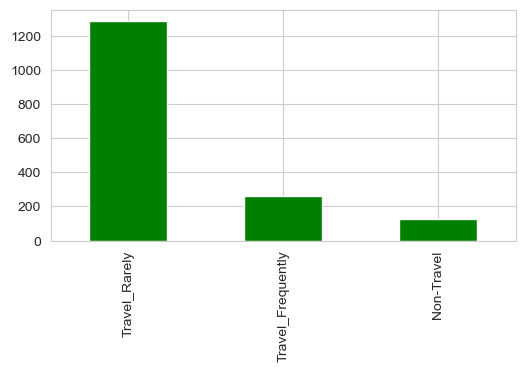



barplot for: Department


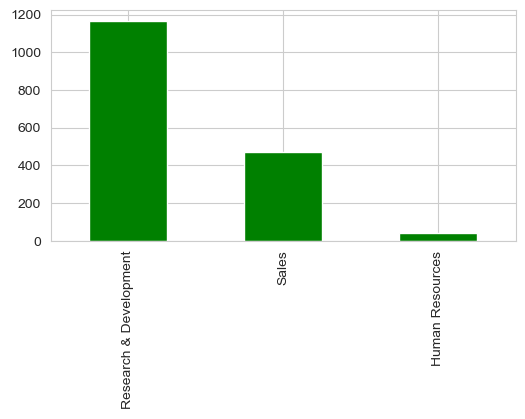



barplot for: Education


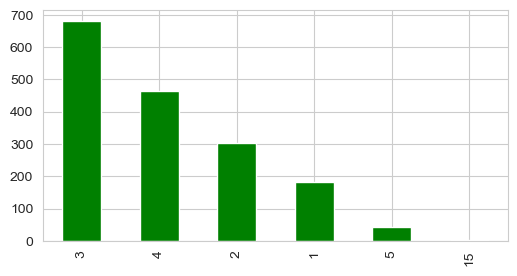



barplot for: EducationField


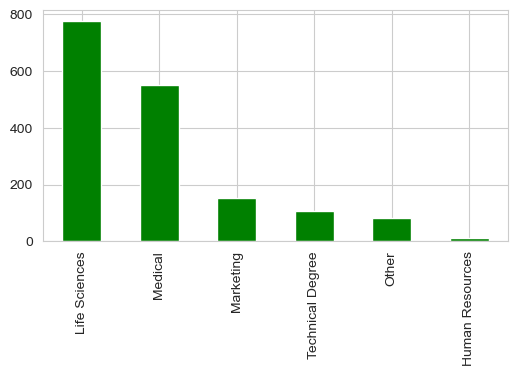



barplot for: EnvironmentSatisfaction


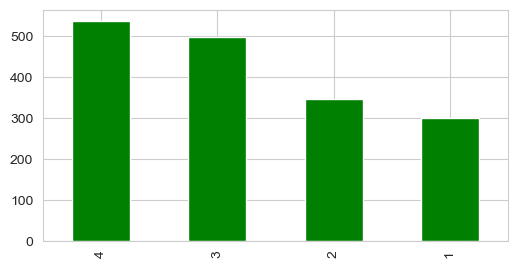



barplot for: Gender


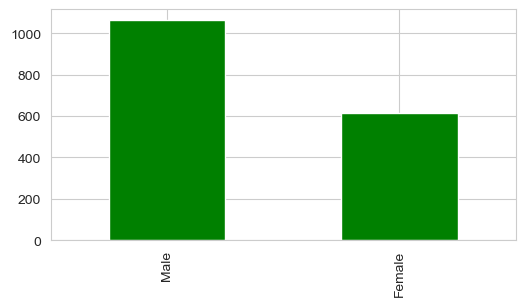



barplot for: JobInvolvement


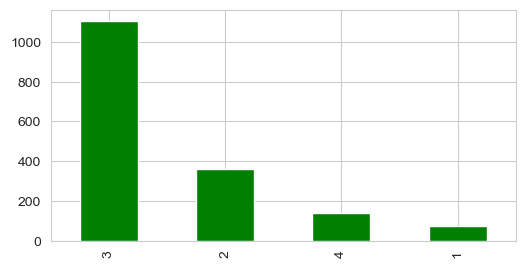



barplot for: JobRole


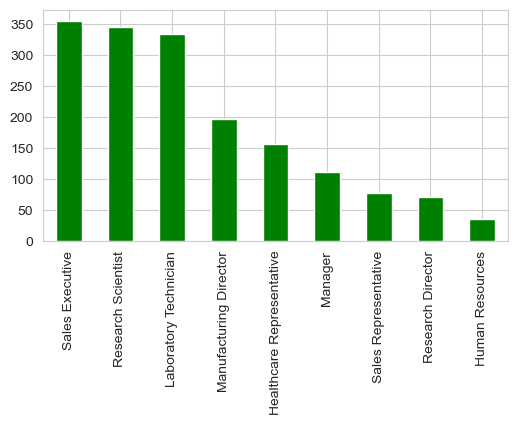



barplot for: JobSatisfaction


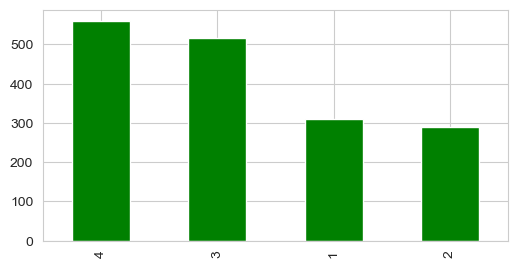



barplot for: MaritalStatus


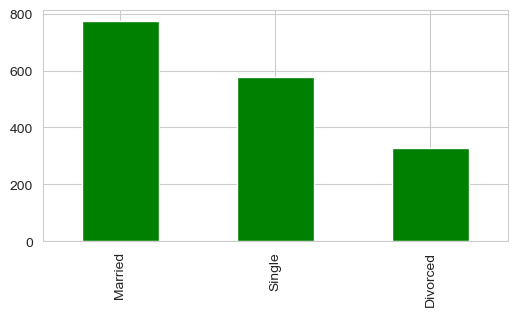



barplot for: NumCompaniesWorked


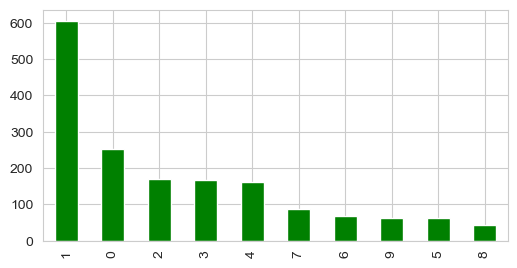



barplot for: OverTime


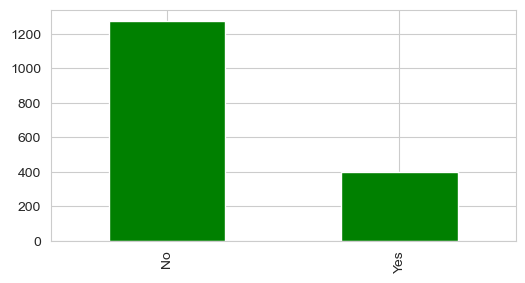



barplot for: PerformanceRating


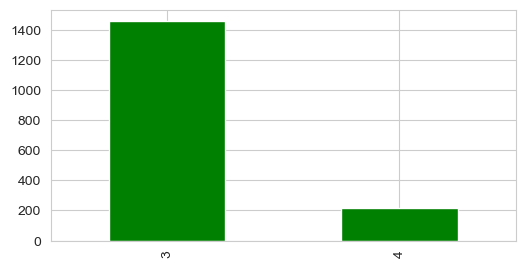



barplot for: RelationshipSatisfaction


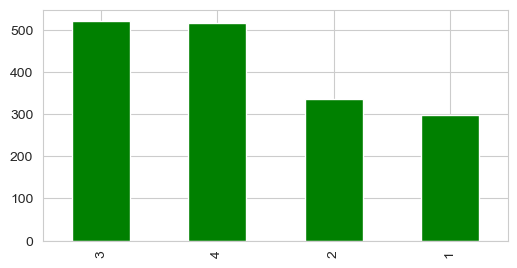



barplot for: StockOptionLevel


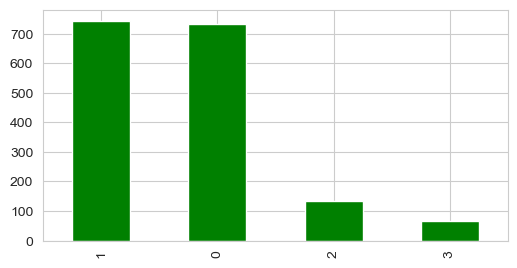



barplot for: TrainingTimesLastYear


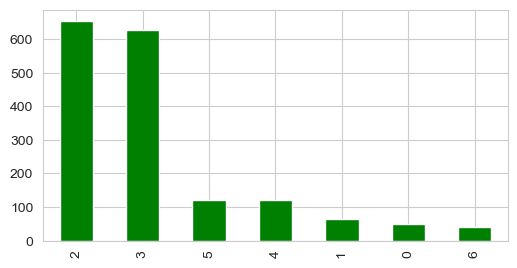



barplot for: WorkLifeBalance


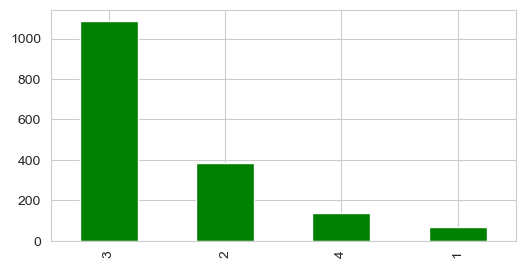



barplot for: Attrition


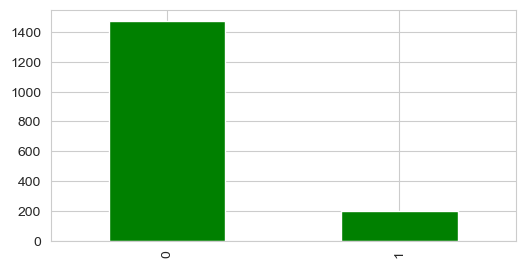

In [32]:
for i in train_data_new.columns:
    plt.figure(figsize=[6,3],)
    print('barplot for:', i)
    train_data_new[i].value_counts().plot(kind='bar',color="green")
    plt.show()
    print('\n')

Pieplot for: BusinessTravel


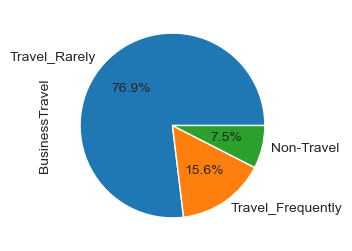



Pieplot for: Department


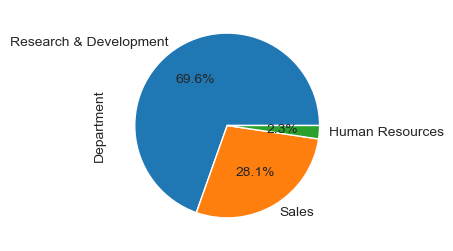



Pieplot for: Education


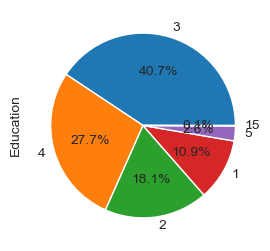



Pieplot for: EducationField


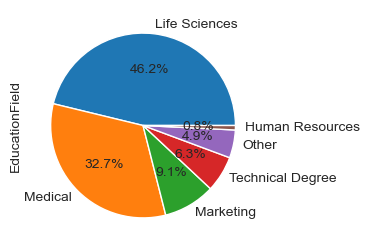



Pieplot for: EnvironmentSatisfaction


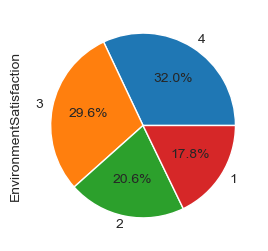



Pieplot for: Gender


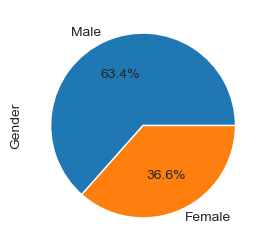



Pieplot for: JobInvolvement


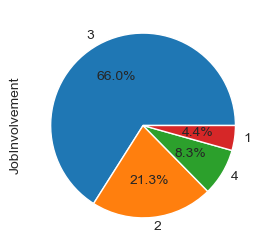



Pieplot for: JobRole


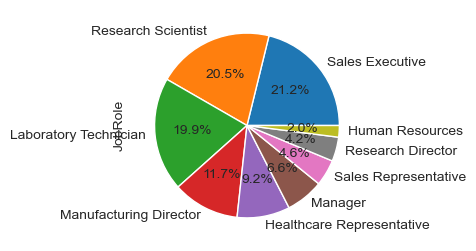



Pieplot for: JobSatisfaction


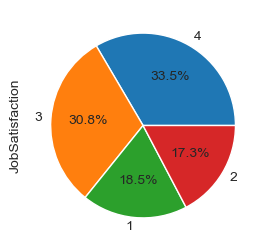



Pieplot for: MaritalStatus


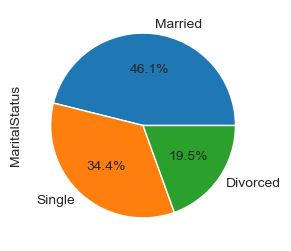



Pieplot for: NumCompaniesWorked


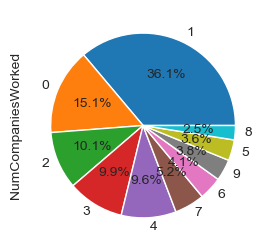



Pieplot for: OverTime


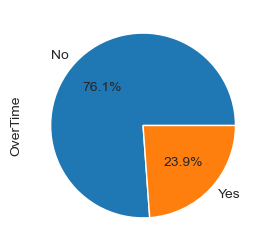



Pieplot for: PerformanceRating


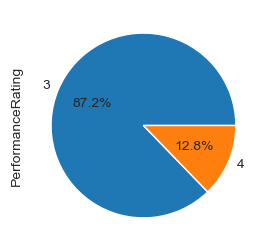



Pieplot for: RelationshipSatisfaction


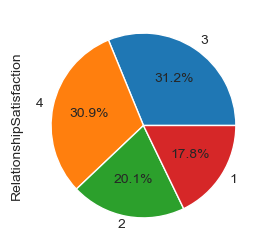



Pieplot for: StockOptionLevel


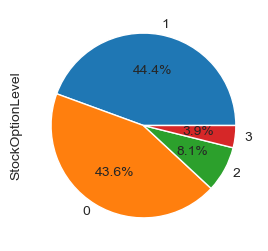



Pieplot for: TrainingTimesLastYear


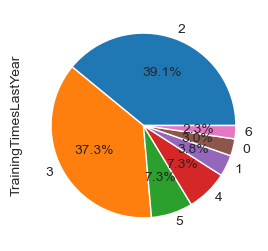



Pieplot for: WorkLifeBalance


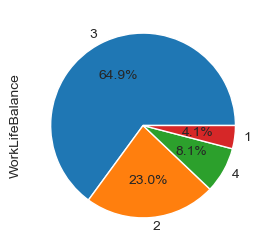



Pieplot for: Attrition


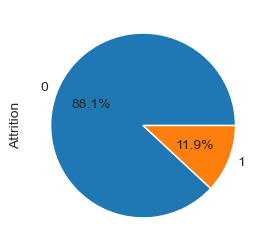

In [33]:
for i in train_data_new.columns:
    plt.figure(figsize=[6,3],)
    print('Pieplot for:', i)
    train_data_new[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show()
    print('\n')

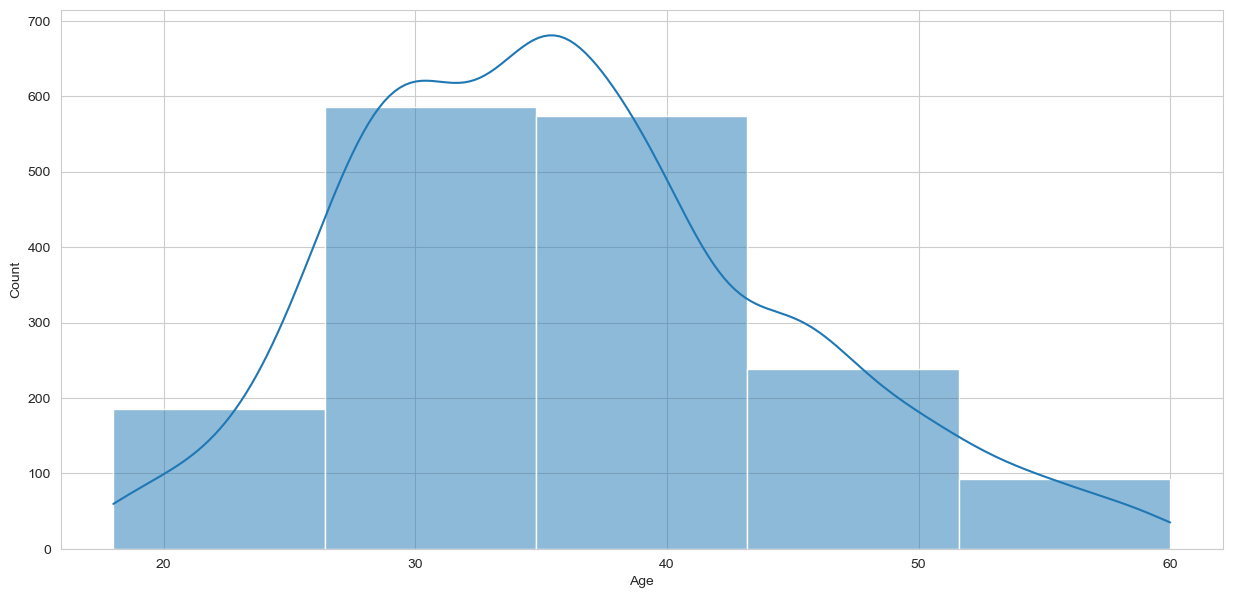

In [34]:
plt.figure(figsize=[15,7],)
sns.histplot(train_data['Age'], kde = 'True', bins = 5, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [35]:
corr = train_data.drop('Attrition',axis=1).corr()

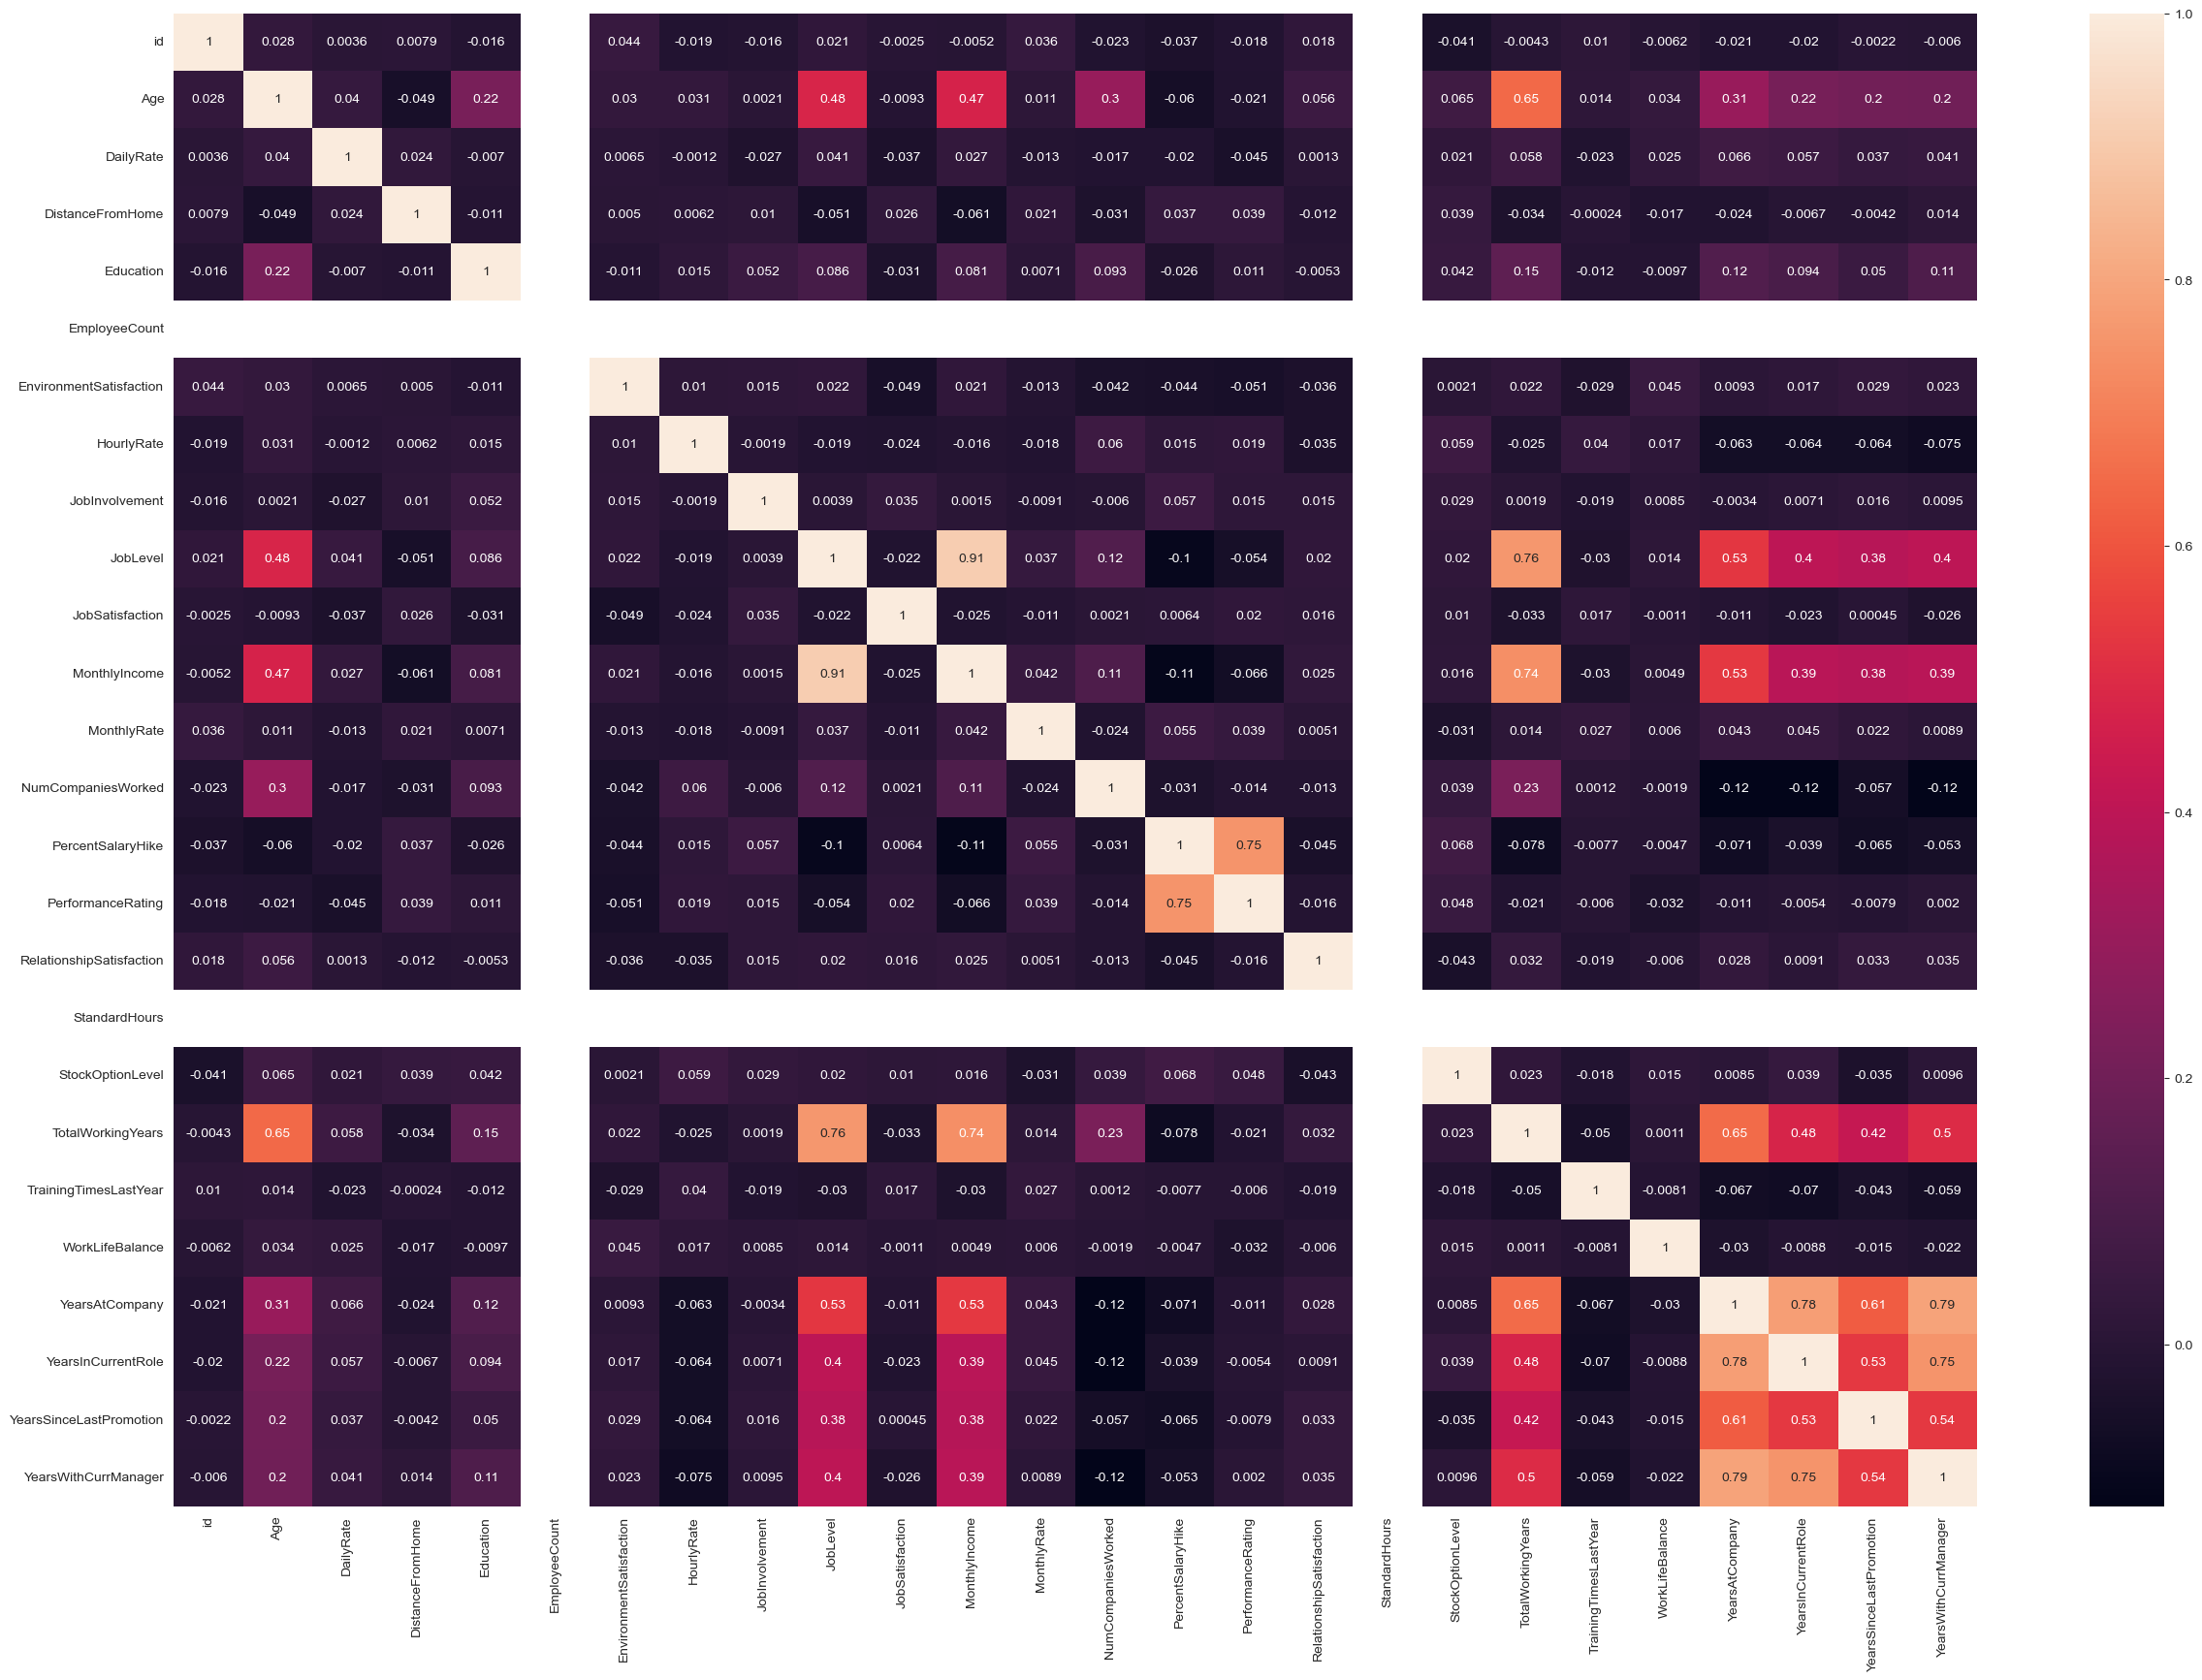

In [36]:
plt.figure(figsize=[30,20],)
sns.heatmap(corr, annot = True)
plt.show()

In [37]:
# Split data into objectcols 
objectcols=train_data.select_dtypes(include=['object'])
numericcols=train_data.select_dtypes(include=np.number)


In [38]:
print(objectcols.shape)
print(numericcols.shape)

(1677, 8)
(1677, 27)


In [39]:
# Lable Encoding or Dummy Encoding objectcols 
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [41]:
objectcols_encode=objectcols.apply(le.fit_transform)

In [42]:
objectcols_encode.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,1,3,1,2,1,0,1
1,2,2,4,1,8,1,0,0
2,2,2,2,1,7,0,0,0
3,2,1,3,0,0,1,0,0
4,2,1,3,0,3,2,0,1


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
numericcols_scaled=scaler.fit_transform(numericcols.drop('Attrition',axis=1))

In [46]:
numericcols.columns

Index(['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [47]:
numericcols_scaled=pd.DataFrame(numericcols_scaled,columns=['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [48]:
numericcols_scaled.head()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.731018,-0.004347,-0.784620,1.957619,0.059701,0.0,1.143200,-1.327755,0.334605,-0.922480,...,-0.697247,0.0,0.361171,-0.097836,-0.640088,0.355464,0.542921,-1.156875,1.649190,1.066637
1,-1.728953,-0.121931,0.075458,-0.087420,0.059701,0.0,-1.617933,-1.121889,0.334605,-0.922480,...,1.158758,0.0,0.361171,-0.925083,0.233328,0.355464,-0.477223,-0.598579,-0.649805,-0.331917
2,-1.726887,-0.474682,-0.466765,2.213249,0.059701,0.0,0.222822,0.627971,0.334605,0.001101,...,1.158758,0.0,1.658139,-0.925083,0.233328,0.355464,-0.647246,-0.598579,-0.321378,-0.611627
3,-1.724821,0.230820,1.589944,-0.854310,0.059701,0.0,0.222822,-1.430688,0.334605,0.001101,...,0.230755,0.0,-0.935797,0.591537,-1.513504,-2.733206,-0.137175,-1.156875,-0.649805,-0.611627
4,-1.722756,1.641826,0.331879,-0.470865,1.022379,0.0,-0.697555,-1.585087,0.334605,2.771845,...,0.230755,0.0,-0.935797,2.797529,-2.386920,0.355464,4.113421,2.751197,0.663906,1.626058


In [49]:
numariccols_scaled=numericcols_scaled.reset_index()

In [50]:
objectcols_encode=objectcols_encode.reset_index()

In [51]:
train_data_df=pd.concat([numericcols_scaled,objectcols_encode],axis=1)

In [52]:
X = train_data_df.drop(['id'],axis=1)
y = train_data['Attrition']

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logit= LogisticRegression(max_iter=3000,random_state=123)

In [55]:
logitmodel=logit.fit(X,y)

In [56]:
logitmodel.score(X,y)

0.8896839594514013

In [57]:
logitpredict=logitmodel.predict(X)

In [58]:
pd.crosstab(y,logitpredict)

col_0,0,1
Attrition,,
0,1453,24
1,161,39


In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1477
           1       0.62      0.20      0.30       200

    accuracy                           0.89      1677
   macro avg       0.76      0.59      0.62      1677
weighted avg       0.87      0.89      0.86      1677



In [61]:
from sklearn.metrics import RocCurveDisplay

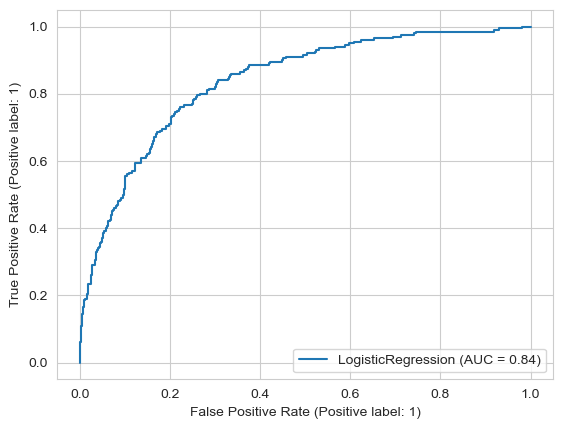

In [62]:
RocCurveDisplay.from_estimator(logit,X,y)